# European Data

For this project I will be using visualisations and statistical methods in order to answer questions about Europe. 

I have put this data together myself from the following online sources: 

- EU membership status : https://europa.eu/european-union/about-eu/countries_en
- Euro currency users : https://europa.eu/european-union/about-eu/countries_en#countries-using-the-euro
- Population : https://www.worldometers.info/world-population/population-by-country/
- GDP per country : https://www.worldometers.info/gdp/gdp-by-country/
- Defence Budget : https://www.globalfirepower.com/defense-spending-budget.asp
- External Debt : https://www.globalfirepower.com/external-debt-by-country.asp
- Net exports : https://en.wikipedia.org/wiki/List_of_countries_by_net_exports
- Quality of life index : https://www.numbeo.com/quality-of-life/rankings_by_country.jsp

Disclaimer: This data is collected from the sources above, therefore the credibility of the results within this project are based on my findings using this data.

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
# plt.rcParams["figure.figsize"] = [5, 5]

In [2]:
euro = pd.read_csv(r"C:\Users\georg\DataPython\European Dataset.csv")

In [3]:
euro.head()

,Country Name,EU Membership Status,Euro Currency Users,Population,GDP (Billions)($),Military Spending (Millions)($),External Debt (Billions)($),Net Exports (Millions)($),Quality of life index (mid 2020)
0,Andorra,Not a Member,No,77265.0,3.0,NaN,NaN,-1178.0,NaN
1,Armenia,Not a Member,No,2969249.0,11.0,1385.0,10.0,-1128.0,114.09
2,Albania,Candidate,No,2877797.0,13.0,250.0,9.0,-3123.0,99.20
3,Austria,Member,Yes,9006398.0,417.0,3380.0,631.0,-6500.0,181.68
4,Azerbaijan,Not a Member,No,10139177.0,40.0,2805.0,17.0,6956.0,102.69


#### Data Cleaning

In [4]:
null_data = euro[euro.isnull().any(axis = 1)]
null_data

,Country Name,EU Membership Status,Euro Currency Users,Population,GDP (Billions)($),Military Spending (Millions)($),External Debt (Billions)($),Net Exports (Millions)($),Quality of life index (mid 2020)
0,Andorra,Not a Member,No,77265.0,3.0,NaN,NaN,-1178.0,NaN
10,Cyprus,Member,Yes,1207359.0,22.0,335.0,NaN,-4979.0,146.90
20,Iceland,Not a Member,No,341243.0,24.0,NaN,NaN,-1074.0,180.74
23,Kosovo,Potential Candidate,No,NaN,NaN,NaN,NaN,-2795.0,NaN
25,Liechtenstein,Not a Member,No,38128.0,NaN,NaN,NaN,3217.0,NaN
27,Luxembourg,Member,Yes,625978.0,62.0,NaN,NaN,-4000.0,NaN
28,Malta,Member,Yes,441543.0,12.0,NaN,NaN,-2564.0,121.82
30,Monaco,Not a Member,No,39242.0,NaN,NaN,NaN,-406.0,NaN
39,San Marino,Not a Member,No,33931.0,1.0,NaN,NaN,1276.0,NaN
49,Vatican City,Not a Member,No,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
null_data.count()

Country Name                        10
EU Membership Status                10
Euro Currency Users                 10
Population                           8
GDP (Billions)($)                    6
Military Spending (Millions)($)      1
External Debt (Billions)($)          0
Net Exports (Millions)($)            9
Quality of life index (mid 2020)     3
dtype: int64

We can see the missing data is mostly for the small nation states, therefore I am going to drop the countries which don't have a quality of life index value.

For Cyprus, Iceland and Malta I will find data from an external source to fill the values.

Sources:

- External Debt Cyprus : https://www.ceicdata.com/en/indicator/cyprus/external-debt
- External Debt Iceland : https://tradingeconomics.com/iceland/external-debt#:~:text=Looking%20forward%2C%20we%20estimate%20External,according%20to%20our%20econometric%20models.
- Military Spending Iceland : https://www.icelandreview.com/news/iceland-ups-defence-budget-by-37/
- Military Spending Malta : https://en.wikipedia.org/wiki/Armed_Forces_of_Malta
- External Debt Malta : https://www.ceicdata.com/en/indicator/malta/external-debt--of-nominal-gdp#:~:text=The%20country's%20External%20Debt%20reached,USD%20bn%20in%20Jun%202020. 

In [6]:
# Cyprus
euro.at[10, "External Debt (Billions)($)"] = 209

# Iceland

euro.at[20, "Military Spending (Millions)($)"] = 17
euro.at[20, "External Debt (Billions)($)"] = 19

# Malta

euro.at[28, "Military Spending (Millions)($)"] = 64
euro.at[28, "External Debt (Billions)($)"] = 102

In [7]:
euro.dropna(inplace = True)

In [8]:
euro

,Country Name,EU Membership Status,Euro Currency Users,Population,GDP (Billions)($),Military Spending (Millions)($),External Debt (Billions)($),Net Exports (Millions)($),Quality of life index (mid 2020)
1,Armenia,Not a Member,No,2969249.0,11.0,1385.0,10.0,-1128.0,114.09
2,Albania,Candidate,No,2877797.0,13.0,250.0,9.0,-3123.0,99.20
3,Austria,Member,Yes,9006398.0,417.0,3380.0,631.0,-6500.0,181.68
4,Azerbaijan,Not a Member,No,10139177.0,40.0,2805.0,17.0,6956.0,102.69
5,Belarus,Not a Member,No,9449323.0,54.0,623.0,40.0,-2000.0,133.52
6,Belgium,Member,Yes,11589623.0,495.0,4921.0,1281.0,3000.0,149.75
7,Bosnia & Herzegovina,Not a Member,No,3280819.0,18.0,165.0,11.0,-4310.0,123.05
8,Bulgaria,Member,No,6948445.0,58.0,1079.0,42.0,-4240.0,127.14
9,Croatia,Member,No,4105267.0,55.0,800.0,48.0,-8810.0,156.77
10,Cyprus,Member,Yes,1207359.0,22.0,335.0,209.0,-4979.0,146.90


In [9]:
check_null = euro[euro.isnull().any(axis = 1)]
check_null  # No more null values

,Country Name,EU Membership Status,Euro Currency Users,Population,GDP (Billions)($),Military Spending (Millions)($),External Debt (Billions)($),Net Exports (Millions)($),Quality of life index (mid 2020)


In [10]:
euro.set_index("Country Name", inplace = True)

In [11]:
euro["Population"] = euro["Population"].astype(int)
euro["GDP (Billions)($)"] = euro["GDP (Billions)($)"].astype(int)
euro["Military Spending (Millions)($)"] = euro["Military Spending (Millions)($)"].astype(int)
euro["External Debt (Billions)($)"] = euro["External Debt (Billions)($)"].astype(int)
euro["Net Exports (Millions)($)"] = euro["Net Exports (Millions)($)"].astype(int)

In [12]:
euro

,EU Membership Status,Euro Currency Users,Population,GDP (Billions)($),Military Spending (Millions)($),External Debt (Billions)($),Net Exports (Millions)($),Quality of life index (mid 2020)
Country Name,,,,,,,,
Armenia,Not a Member,No,2969249,11,1385,10,-1128,114.09
Albania,Candidate,No,2877797,13,250,9,-3123,99.20
Austria,Member,Yes,9006398,417,3380,631,-6500,181.68
Azerbaijan,Not a Member,No,10139177,40,2805,17,6956,102.69
Belarus,Not a Member,No,9449323,54,623,40,-2000,133.52
Belgium,Member,Yes,11589623,495,4921,1281,3000,149.75
Bosnia & Herzegovina,Not a Member,No,3280819,18,165,11,-4310,123.05
Bulgaria,Member,No,6948445,58,1079,42,-4240,127.14
Croatia,Member,No,4105267,55,800,48,-8810,156.77


#### Data Visualisation

In [13]:
eu_members = euro["EU Membership Status"].value_counts()
eu_members

Member          26
Not a Member    12
Candidate        5
Name: EU Membership Status, dtype: int64

([<matplotlib.patches.Wedge at 0x13252bcaa08>,
 [Text(-1.1357277396000174, -0.38745645110519916, 'Member'),
  Text(1.1991994172808775, -0.043826448557963776, 'Not a Member'),
  Text(0.4286770268840835, 1.12081934611329, 'Candidate')],
 [Text(-0.66250784810001, -0.22601626314469947, '60.5%'),
  Text(0.6995329934138452, -0.025565428325478867, '27.9%'),
  Text(0.25006159901571534, 0.6538112852327524, '11.6%')])

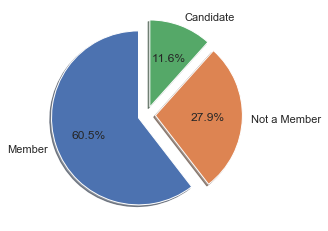

In [14]:
explode = (0.1, 0.1, 0.1)
plt.pie(eu_members, labels = eu_members.index, startangle = 90, 
        shadow = True, explode = explode, autopct='%1.1f%%')

In [15]:
EU_countries = euro[euro["EU Membership Status"] == "Member"]
euro_users = EU_countries["Euro Currency Users"].value_counts()
euro_users

Yes    18
No      8
Name: Euro Currency Users, dtype: int64

([<matplotlib.patches.Wedge at 0x13252c5f9c8>,
 [Text(-0.9052822164801494, -0.6248712735634342, 'Yes'),
  Text(0.9875805359732448, 0.6816778454422581, 'No')],
 [Text(-0.49379029989826323, -0.34083887648914585, '69.2%'),
  Text(0.5760886459843927, 0.39764540984131713, '30.8%')])

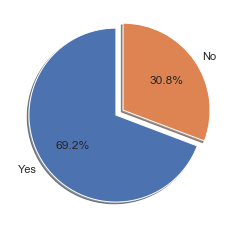

In [16]:
explode = (0, 0.1)
plt.pie(euro_users, labels = euro_users.index, startangle = 90, 
        shadow = True, explode = explode, autopct='%1.1f%%')

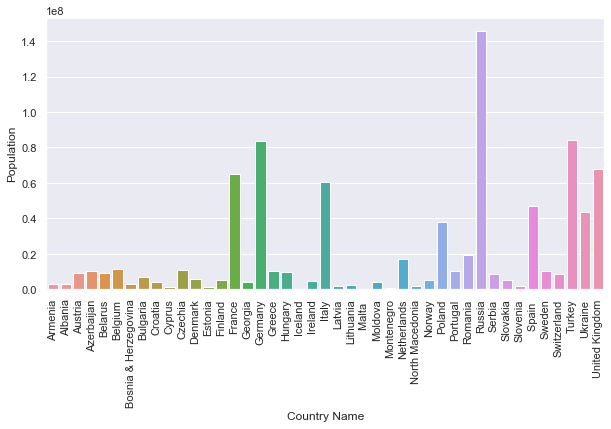

In [17]:
plt.figure(figsize = (10, 5))
sns.barplot(x = euro.index, y = euro["Population"])
plt.xlabel("Country Name")
plt.xticks(rotation = 90)
plt.ylabel("Population")
plt.show()

In [18]:
w_euro = euro.loc[["Iceland", "Ireland", "United Kingdom", "France", "Spain ", "Italy", "Portugal",
                    "Sweden", "Finland", "Norway", "Denmark", "Netherlands", "Belgium", "Germany",
                   "Czechia", "Switzerland", "Austria", "Malta "]]
w_euro

,EU Membership Status,Euro Currency Users,Population,GDP (Billions)($),Military Spending (Millions)($),External Debt (Billions)($),Net Exports (Millions)($),Quality of life index (mid 2020)
Country Name,,,,,,,,
Iceland,Not a Member,No,341243,24,17,19,-1074,180.74
Ireland,Member,Yes,4937786,331,870,2470,129070,150.16
United Kingdom,Not a Member,No,67886011,2638,55100,8126,-166000,161.20
France,Member,Yes,65273511,2583,41500,5360,-73100,150.68
Spain,Member,Yes,46754778,1314,15100,2094,-31900,167.05
Italy,Member,Yes,60461826,1944,27800,2444,72400,138.97
Portugal,Member,Yes,10196709,219,3358,449,-11720,162.46
Sweden,Member,No,10099265,536,6326,940,14900,172.18
Finland,Member,Yes,5540720,252,3570,151,-2500,186.40


In [19]:
e_euro = euro.loc[["Russia", "Estonia", "Latvia", "Lithuania", "Belarus", "Ukraine",
                   "Romania", "Moldova", "Bulgaria", "North Macedonia", "Greece", "Turkey",
                   "Cyprus", "Montenegro", "Bosnia & Herzegovina", "Croatia", "Slovakia",
                   "Slovenia", "Hungary", "Poland", "Armenia", "Azerbaijan", "Georgia",
                   "Albania", "Serbia"]]
e_euro

,EU Membership Status,Euro Currency Users,Population,GDP (Billions)($),Military Spending (Millions)($),External Debt (Billions)($),Net Exports (Millions)($),Quality of life index (mid 2020)
Country Name,,,,,,,,
Russia,Not a Member,No,145934462,1578,48000,540,124100,101.57
Estonia,Member,Yes,1326535,26,685,19,-1290,175.99
Latvia,Member,Yes,1886198,30,724,40,-2790,148.68
Lithuania,Member,Yes,2722289,47,1107,34,-4010,159.77
Belarus,Not a Member,No,9449323,54,623,40,-2000,133.52
Ukraine,Not a Member,No,43733762,112,5400,130,-7570,105.26
Romania,Member,No,19237691,212,5050,96,-13200,131.69
Moldova,Not a Member,No,4033963,8,30,7,-2406,110.53
Bulgaria,Member,No,6948445,58,1079,42,-4240,127.14


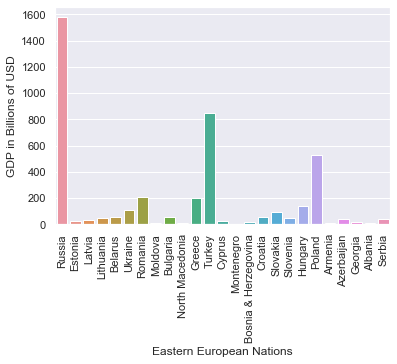

In [20]:
sns.barplot(x = e_euro.index, y = e_euro["GDP (Billions)($)"])
plt.xticks(rotation = 90)
plt.xlabel("Eastern European Nations")
plt.ylabel("GDP in Billions of USD")
plt.show()

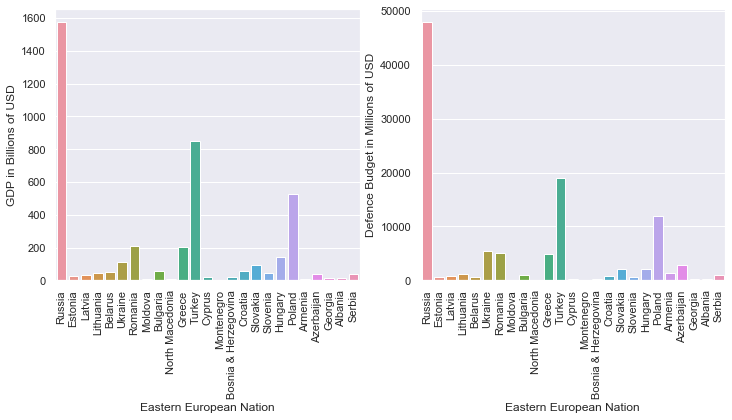

In [21]:
x = e_euro.index
y1 = e_euro["GDP (Billions)($)"]
y2 = e_euro["Military Spending (Millions)($)"]

plt.figure(figsize = (12, 5))
plt.subplot(1, 2, 1)
sns.barplot(x = x, y = y1)
plt.xticks(rotation = 90)
plt.xlabel("Eastern European Nation")
plt.ylabel("GDP in Billions of USD")

plt.subplot(1, 2, 2)
sns.barplot(x = x, y = y2)
plt.xticks(rotation = 90)
plt.xlabel("Eastern European Nation")
plt.ylabel("Defence Budget in Millions of USD")

plt.show()

In [22]:
euro["GDP Spent On Defence (%)"] = ((euro["Military Spending (Millions)($)"] / 1000) / 
                                    euro["GDP (Billions)($)"] * 100)

In [23]:
euro

,EU Membership Status,Euro Currency Users,Population,GDP (Billions)($),Military Spending (Millions)($),External Debt (Billions)($),Net Exports (Millions)($),Quality of life index (mid 2020),GDP Spent On Defence (%)
Country Name,,,,,,,,,
Armenia,Not a Member,No,2969249,11,1385,10,-1128,114.09,12.590909
Albania,Candidate,No,2877797,13,250,9,-3123,99.20,1.923077
Austria,Member,Yes,9006398,417,3380,631,-6500,181.68,0.810552
Azerbaijan,Not a Member,No,10139177,40,2805,17,6956,102.69,7.012500
Belarus,Not a Member,No,9449323,54,623,40,-2000,133.52,1.153704
Belgium,Member,Yes,11589623,495,4921,1281,3000,149.75,0.994141
Bosnia & Herzegovina,Not a Member,No,3280819,18,165,11,-4310,123.05,0.916667
Bulgaria,Member,No,6948445,58,1079,42,-4240,127.14,1.860345
Croatia,Member,No,4105267,55,800,48,-8810,156.77,1.454545


In [24]:
euro["GDP Spent On Defence (%)"].sort_values(ascending = False)

Country Name
Armenia                 12.590909
Azerbaijan               7.012500
Ukraine                  4.821429
Russia                   3.041825
Estonia                  2.634615
Latvia                   2.413333
Greece                   2.386207
Romania                  2.382075
Lithuania                2.355319
Poland                   2.281369
Slovakia                 2.232632
Turkey                   2.230047
Serbia                   2.212195
Georgia                  2.180000
United Kingdom           2.088704
Albania                  1.923077
Bulgaria                 1.860345
Norway                   1.799248
Montenegro               1.625000
France                   1.606659
Portugal                 1.533333
Cyprus                   1.522727
Netherlands              1.494465
Hungary                  1.485714
Croatia                  1.454545
Denmark                  1.442424
Italy                    1.430041
Finland                  1.416667
Czechia                  1.374537
G

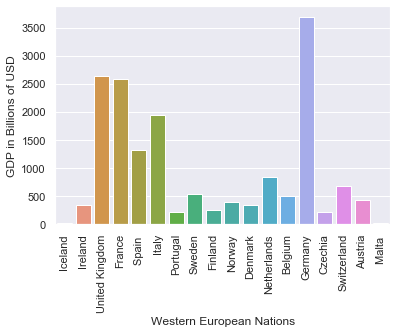

In [25]:
sns.barplot(x = w_euro.index, y = w_euro["GDP (Billions)($)"])
plt.xticks(rotation = 90)
plt.xlabel("Western European Nations")
plt.ylabel("GDP in Billions of USD")
plt.show()

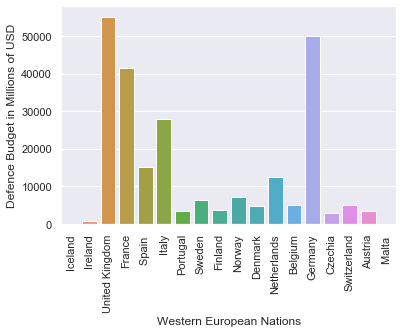

In [26]:
sns.barplot(x = w_euro.index, y = w_euro["Military Spending (Millions)($)"])
plt.xticks(rotation = 90)
plt.xlabel("Western European Nations")
plt.ylabel("Defence Budget in Millions of USD")
plt.show()

In [27]:
non_EU_countries = euro[euro["EU Membership Status"] != "Member"]
EU_countries = euro[euro["EU Membership Status"] == "Member"]

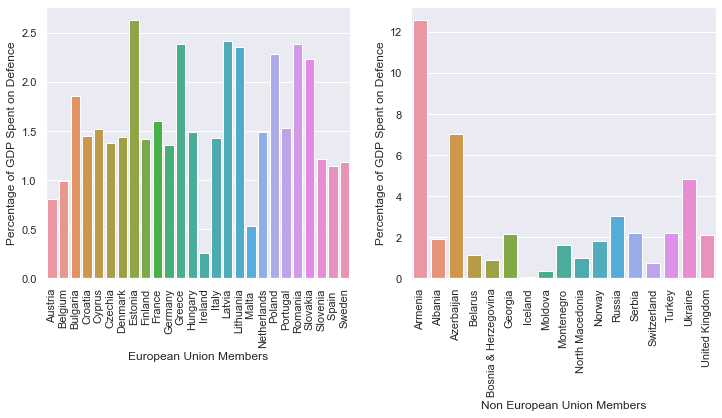

In [28]:
x1 = EU_countries.index
x2 = non_EU_countries.index
y1 = EU_countries["GDP Spent On Defence (%)"]
y2 = non_EU_countries["GDP Spent On Defence (%)"]

plt.figure(figsize = (12,5))
plt.subplot(1, 2, 1)
sns.barplot(x = x1, y = y1)
plt.xticks(rotation = 90)
plt.xlabel("European Union Members")
plt.ylabel("Percentage of GDP Spent on Defence")

plt.subplot(1, 2, 2)
sns.barplot(x = x2, y = y2)
plt.xticks(rotation = 90)
plt.xlabel("Non European Union Members")
plt.ylabel("Percentage of GDP Spent on Defence")

plt.show()

In [29]:
total_non_eu = non_EU_countries["Military Spending (Millions)($)"].sum()
total_eu = EU_countries["Military Spending (Millions)($)"].sum()
data_eu = total_eu, total_non_eu
data_eu

(208443, 146361)

In [30]:
res = data_eu[0] - data_eu[1] 
res / data_eu[1] * 100

42.41703732551704

In [31]:
total_non_eu = non_EU_countries["Population"].sum()
total_eu = EU_countries["Population"].sum()
sum_eu = total_eu, total_non_eu
sum_eu

(444624536, 404494276)

In [32]:
res = sum_eu[0] - sum_eu[1]
res / sum_eu[1] * 100

9.9210946559847

In [33]:
total_non_eu = non_EU_countries["Military Spending (Millions)($)"].mean()
total_eu = EU_countries["Military Spending (Millions)($)"].mean()
data_eu = total_eu, total_non_eu
data_eu

(8017.038461538462, 8609.470588235294)

In [34]:
res = data_eu[0] - data_eu[1] 
res / data_eu[1] * 100

-6.881167902546539

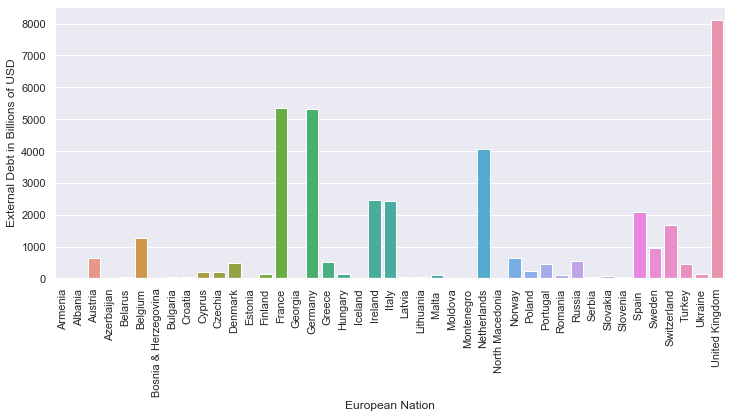

In [35]:
plt.figure(figsize = (12, 5))
sns.barplot(x = euro.index, y = euro["External Debt (Billions)($)"])
plt.xticks(rotation = 90)
plt.xlabel("European Nation")
plt.ylabel("External Debt in Billions of USD")
plt.show()

In [36]:
euro["Net Exports (Millions)($)"].sort_values(ascending = False)

Country Name
Germany                 297000
Ireland                 129070
Russia                  124100
Netherlands              91000
Italy                    72400
Switzerland              50100
Norway                   22900
Denmark                  18590
Sweden                   14900
Czechia                  10000
Azerbaijan                6956
Hungary                   5440
Belgium                   3000
Slovakia                  2610
Slovenia                  1530
Poland                    -400
Iceland                  -1074
Armenia                  -1128
Estonia                  -1290
Belarus                  -2000
North Macedonia          -2170
Montenegro               -2196
Moldova                  -2406
Finland                  -2500
Malta                    -2564
Latvia                   -2790
Albania                  -3123
Lithuania                -4010
Bulgaria                 -4240
Bosnia & Herzegovina     -4310
Georgia                  -4313
Serbia                   -

In [37]:
euro["Net Exports (Millions)($)"].sum()

420253

In [38]:
net_non_eu = non_EU_countries["Net Exports (Millions)($)"].mean()
net_eu = EU_countries["Net Exports (Millions)($)"].mean()
total = net_non_eu, net_eu
total

(-2134.3529411764707, 17559.115384615383)

In [39]:
total[1] - total[0]  # difference between EU net exports and non-EU net exports

19693.468325791855

In [40]:
res = total[0] - total[1]
res / total[0] * 100          

922.6903360667553

In [41]:
QOL = euro["Quality of life index (mid 2020)"].sort_values(ascending = False)
QOL

Country Name
Denmark                 192.53
Switzerland             190.92
Finland                 186.40
Netherlands             184.18
Austria                 181.68
Iceland                 180.74
Germany                 177.25
Estonia                 175.99
Norway                  174.55
Sweden                  172.18
Slovenia                169.81
Spain                   167.05
Portugal                162.46
United Kingdom          161.20
Lithuania               159.77
Croatia                 156.77
Czechia                 154.70
France                  150.68
Ireland                 150.16
Slovakia                149.93
Belgium                 149.75
Latvia                  148.68
Cyprus                  146.90
Italy                   138.97
Montenegro              134.94
Belarus                 133.52
Romania                 131.69
Greece                  131.51
Hungary                 128.40
Bulgaria                127.14
Turkey                  126.40
Poland                  12

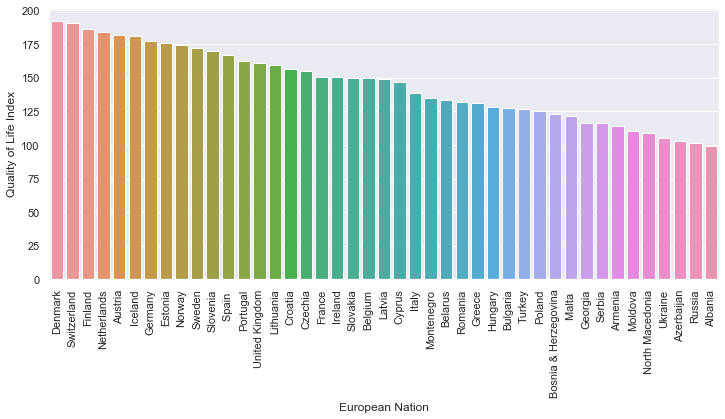

In [42]:
plt.figure(figsize = (12, 5))
sns.barplot(x = QOL.index, y = QOL)
plt.xticks(rotation = 90)
plt.xlabel("European Nation")
plt.ylabel("Quality of Life Index")
plt.show()

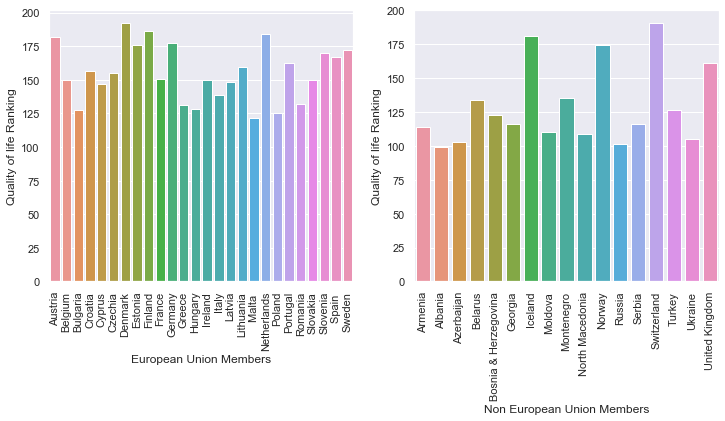

In [43]:
x1 = EU_countries.index
x2 = non_EU_countries.index
y1 = EU_countries["Quality of life index (mid 2020)"]
y2 = non_EU_countries["Quality of life index (mid 2020)"]

plt.figure(figsize = (12,5))
plt.subplot(1, 2, 1)
sns.barplot(x = x1, y = y1)
plt.xticks(rotation = 90)
plt.xlabel("European Union Members")
plt.ylabel("Quality of life Ranking")

plt.subplot(1, 2, 2)
sns.barplot(x = x2, y = y2)
plt.xticks(rotation = 90)
plt.xlabel("Non European Union Members")
plt.ylabel("Quality of life Ranking")

plt.show()

In [44]:
mean_happiness = y1.mean(), y2.mean()
mean_happiness    #Mean happiness between The EU and non EU nations

(155.44615384615383, 129.41764705882352)

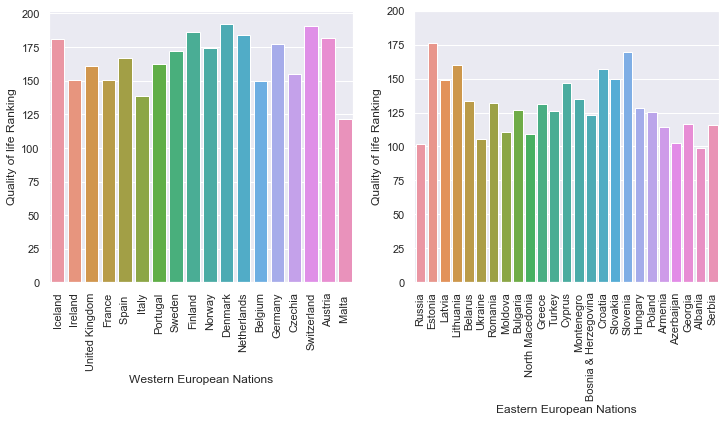

In [45]:
x1 = w_euro.index
x2 = e_euro.index
y1 = w_euro["Quality of life index (mid 2020)"]
y2 = e_euro["Quality of life index (mid 2020)"]

plt.figure(figsize = (12,5))
plt.subplot(1, 2, 1)
sns.barplot(x = x1, y = y1)
plt.xticks(rotation = 90)
plt.xlabel("Western European Nations")
plt.ylabel("Quality of life Ranking")

plt.subplot(1, 2, 2)
sns.barplot(x = x2, y = y2)
plt.xticks(rotation = 90)
plt.xlabel("Eastern European Nations")
plt.ylim(0, 200)
plt.ylabel("Quality of life Ranking")

plt.show()

In [46]:
QOL_w_euro = w_euro["Quality of life index (mid 2020)"].mean()
QOL_e_euro = e_euro["Quality of life index (mid 2020)"].mean()
d = {"Mean Quality of Life": [QOL_w_euro, QOL_e_euro]}
df = pd.DataFrame(data = d, index = ["Western Europe", "Eastern Europe"])
df

,Mean Quality of Life
Western Europe,166.512222
Eastern Europe,129.779200


([<matplotlib.patches.Wedge at 0x13252ceb988>,
 [Text(-1.0792076371947106, -0.21286351453598223, 'Western Europe'),
  Text(1.0792076770541326, 0.21286331245055592, 'Eastern Europe')],
 [Text(-0.5886587111971148, -0.11610737156508119, '56.2%'),
  Text(0.5886587329386177, 0.11610726133666685, '43.8%')])

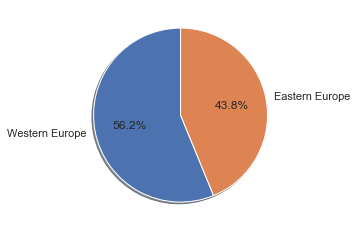

In [47]:
plt.pie(df["Mean Quality of Life"], labels = df.index, startangle = 90, 
        shadow = True, autopct='%1.1f%%')

In [48]:
res = QOL_w_euro - QOL_e_euro
res / QOL_e_euro * 100

28.30424461101798

In [49]:
europe = euro.copy()

In [50]:
europe

,EU Membership Status,Euro Currency Users,Population,GDP (Billions)($),Military Spending (Millions)($),External Debt (Billions)($),Net Exports (Millions)($),Quality of life index (mid 2020),GDP Spent On Defence (%)
Country Name,,,,,,,,,
Armenia,Not a Member,No,2969249,11,1385,10,-1128,114.09,12.590909
Albania,Candidate,No,2877797,13,250,9,-3123,99.20,1.923077
Austria,Member,Yes,9006398,417,3380,631,-6500,181.68,0.810552
Azerbaijan,Not a Member,No,10139177,40,2805,17,6956,102.69,7.012500
Belarus,Not a Member,No,9449323,54,623,40,-2000,133.52,1.153704
Belgium,Member,Yes,11589623,495,4921,1281,3000,149.75,0.994141
Bosnia & Herzegovina,Not a Member,No,3280819,18,165,11,-4310,123.05,0.916667
Bulgaria,Member,No,6948445,58,1079,42,-4240,127.14,1.860345
Croatia,Member,No,4105267,55,800,48,-8810,156.77,1.454545


In [51]:
europe["EU Membership Status"] = europe["EU Membership Status"].map({"Not a Member": 0, 
                                                                    "Candidate": 0, 
                                                                    "Member": 1})

In [52]:
europe["EU Membership Status"].value_counts()

1    26
0    17
Name: EU Membership Status, dtype: int64

In [53]:
europe["Euro Currency Users"] = europe["Euro Currency Users"].map({"Yes": 1, "No": 0})

In [54]:
europe["Euro Currency Users"].value_counts()

0    25
1    18
Name: Euro Currency Users, dtype: int64

#### Regression Analysis

In [55]:
europe.head()

,EU Membership Status,Euro Currency Users,Population,GDP (Billions)($),Military Spending (Millions)($),External Debt (Billions)($),Net Exports (Millions)($),Quality of life index (mid 2020),GDP Spent On Defence (%)
Country Name,,,,,,,,,
Armenia,0,0,2969249,11,1385,10,-1128,114.09,12.590909
Albania,0,0,2877797,13,250,9,-3123,99.20,1.923077
Austria,1,1,9006398,417,3380,631,-6500,181.68,0.810552
Azerbaijan,0,0,10139177,40,2805,17,6956,102.69,7.012500
Belarus,0,0,9449323,54,623,40,-2000,133.52,1.153704


In [56]:
import statsmodels.api as sm

In [57]:
y = europe["GDP (Billions)($)"]
x1 = europe[["Military Spending (Millions)($)", "External Debt (Billions)($)"]]

In [58]:
x = sm.add_constant(x1)
results = sm.OLS(y, x).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      GDP (Billions)($)   R-squared:                       0.923
Model:                            OLS   Adj. R-squared:                  0.919
Method:                 Least Squares   F-statistic:                     238.3
Date:                Fri, 23 Oct 2020   Prob (F-statistic):           6.00e-23
Time:                        12:43:56   Log-Likelihood:                -294.14
No. Observations:                  43   AIC:                             594.3
Df Residuals:                      40   BIC:                             599.6
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===================================================================================================
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const                              28.8335     41.577      0.693      0.492     -55.197     112.864
Military Spending (Millions)($)     0.0403      0.004      9.565      0.000       0.032       0.049
External Debt (Billions)($)         0.1425      0.035      4.122      0.000       0.073       0.212
==============================================================================
Omnibus:                       18.283   Durbin-Watson:                   1.683
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               82.920
Skew:                           0.564   Prob(JB):                     9.87e-19
Kurtosis:                       9.709   Cond. No.                     1.91e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.91e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Predicting nations outside of Europe GDP's based on their military spending and external debt: 

MILITARY SPENDING (Millions)($):
- Japan: 49000
- Canada: 22500
- Australia: 26300
- Argentina: 4200
- Ivory Coast: 550

EXTERNAL DEBT (Billions)($):
- Japan: 3240
- Canada: 1608
- Australia: 1714
- Argentina: 215
- Ivory Coast: 13

In [59]:
x.head()

,const,Military Spending (Millions)($),External Debt (Billions)($)
Country Name,,,
Armenia,1.0,1385,10
Albania,1.0,250,9
Austria,1.0,3380,631
Azerbaijan,1.0,2805,17
Belarus,1.0,623,40


In [60]:
compare = pd.DataFrame({"const": 1, 
                        "Military Spending (Millions)($)": [49000, 22500, 26300, 4200, 550], 
                       "External Debt (Billions)($)": [3240, 1608, 1714, 215, 13]})
compare

,const,Military Spending (Millions)($),External Debt (Billions)($)
0,1,49000,3240
1,1,22500,1608
2,1,26300,1714
3,1,4200,215
4,1,550,13


In [61]:
compare.rename({0: "Japan", 1: "Canada", 2: "Australia", 3: "Argentina", 4: "Ivory Coast"})

,const,Military Spending (Millions)($),External Debt (Billions)($)
Japan,1,49000,3240
Canada,1,22500,1608
Australia,1,26300,1714
Argentina,1,4200,215
Ivory Coast,1,550,13


In [62]:
prediction = results.predict(compare)
prediction

0    2465.839310
1    1165.003051
2    1333.293386
3     228.782236
4      52.857556
dtype: float64

In [63]:
predicted_values = pd.DataFrame({"Predicted GDP (Billions)($)": prediction})
joined = compare.join(predicted_values)
joined.rename(index = {0: "Japan", 1: "Canada", 2: "Australia", 3: "Argentina", 4: "Ivory Coast"})

,const,Military Spending (Millions)($),External Debt (Billions)($),Predicted GDP (Billions)($)
Japan,1,49000,3240,2465.839310
Canada,1,22500,1608,1165.003051
Australia,1,26300,1714,1333.293386
Argentina,1,4200,215,228.782236
Ivory Coast,1,550,13,52.857556


In [64]:
actual_values = pd.DataFrame({"Actual GDP (Billions)($)": [4872, 1647, 1323, 637, 37]})
joined = joined.join(actual_values)
joined.rename(index = {0: "Japan", 1: "Canada", 2: "Australia", 3: "Argentina", 4: "Ivory Coast"})

,const,Military Spending (Millions)($),External Debt (Billions)($),Predicted GDP (Billions)($),Actual GDP (Billions)($)
Japan,1,49000,3240,2465.839310,4872
Canada,1,22500,1608,1165.003051,1647
Australia,1,26300,1714,1333.293386,1323
Argentina,1,4200,215,228.782236,637
Ivory Coast,1,550,13,52.857556,37


In [65]:
europe.head()

,EU Membership Status,Euro Currency Users,Population,GDP (Billions)($),Military Spending (Millions)($),External Debt (Billions)($),Net Exports (Millions)($),Quality of life index (mid 2020),GDP Spent On Defence (%)
Country Name,,,,,,,,,
Armenia,0,0,2969249,11,1385,10,-1128,114.09,12.590909
Albania,0,0,2877797,13,250,9,-3123,99.20,1.923077
Austria,1,1,9006398,417,3380,631,-6500,181.68,0.810552
Azerbaijan,0,0,10139177,40,2805,17,6956,102.69,7.012500
Belarus,0,0,9449323,54,623,40,-2000,133.52,1.153704


In [66]:
y = europe["Quality of life index (mid 2020)"]
x1 = europe.drop(["Quality of life index (mid 2020)"], axis = 1)

In [67]:
x = sm.add_constant(x1)
results = sm.OLS(y, x).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                   OLS Regression Results                                   
============================================================================================
Dep. Variable:     Quality of life index (mid 2020)   R-squared:                       0.444
Model:                                          OLS   Adj. R-squared:                  0.313
Method:                               Least Squares   F-statistic:                     3.391
Date:                              Fri, 23 Oct 2020   Prob (F-statistic):            0.00576
Time:                                      12:43:56   Log-Likelihood:                -190.24
No. Observations:                                43   AIC:                             398.5
Df Residuals:                                    34   BIC:                             414.3
Df Model:                                         8                                         
Covariance Type:                          nonrobust                                         
===================================================================================================
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const                             141.0627      8.120     17.373      0.000     124.562     157.564
EU Membership Status               14.6739     10.098      1.453      0.155      -5.848      35.195
Euro Currency Users                 2.2141     10.192      0.217      0.829     -18.499      22.927
Population                      -4.963e-07   3.82e-07     -1.301      0.202   -1.27e-06    2.79e-07
GDP (Billions)($)                   0.0118      0.019      0.605      0.549      -0.028       0.051
Military Spending (Millions)($)     0.0002      0.001      0.143      0.887      -0.003       0.003
External Debt (Billions)($)         0.0022      0.006      0.388      0.700      -0.009       0.014
Net Exports (Millions)($)        2.576e-05   6.89e-05      0.374      0.711      -0.000       0.000
GDP Spent On Defence (%)           -2.8291      1.848     -1.531      0.135      -6.584       0.926
==============================================================================
Omnibus:                        2.057   Durbin-Watson:                   2.008
Prob(Omnibus):                  0.357   Jarque-Bera (JB):                1.660
Skew:                           0.321   Prob(JB):                        0.436
Kurtosis:                       2.283   Cond. No.                     1.38e+08
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.38e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [68]:
europe.head()

,EU Membership Status,Euro Currency Users,Population,GDP (Billions)($),Military Spending (Millions)($),External Debt (Billions)($),Net Exports (Millions)($),Quality of life index (mid 2020),GDP Spent On Defence (%)
Country Name,,,,,,,,,
Armenia,0,0,2969249,11,1385,10,-1128,114.09,12.590909
Albania,0,0,2877797,13,250,9,-3123,99.20,1.923077
Austria,1,1,9006398,417,3380,631,-6500,181.68,0.810552
Azerbaijan,0,0,10139177,40,2805,17,6956,102.69,7.012500
Belarus,0,0,9449323,54,623,40,-2000,133.52,1.153704


In [69]:
europe["GDP per Capita ($)"] = europe["GDP (Billions)($)"] / europe["Population"]
europe["GDP per Capita ($)"] = europe["GDP per Capita ($)"] * 1000000000
europe["GDP per Capita ($)"] = europe["GDP per Capita ($)"].astype(int)
europe.head()

,EU Membership Status,Euro Currency Users,Population,GDP (Billions)($),Military Spending (Millions)($),External Debt (Billions)($),Net Exports (Millions)($),Quality of life index (mid 2020),GDP Spent On Defence (%),GDP per Capita ($)
Country Name,,,,,,,,,,
Armenia,0,0,2969249,11,1385,10,-1128,114.09,12.590909,3704
Albania,0,0,2877797,13,250,9,-3123,99.20,1.923077,4517
Austria,1,1,9006398,417,3380,631,-6500,181.68,0.810552,46300
Azerbaijan,0,0,10139177,40,2805,17,6956,102.69,7.012500,3945
Belarus,0,0,9449323,54,623,40,-2000,133.52,1.153704,5714


In [70]:
y = europe["Quality of life index (mid 2020)"]
x1 = europe[["GDP per Capita ($)", "EU Membership Status"]]

In [71]:
x = sm.add_constant(x1)
results = sm.OLS(y, x).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                   OLS Regression Results                                   
============================================================================================
Dep. Variable:     Quality of life index (mid 2020)   R-squared:                       0.709
Model:                                          OLS   Adj. R-squared:                  0.695
Method:                               Least Squares   F-statistic:                     48.79
Date:                              Fri, 23 Oct 2020   Prob (F-statistic):           1.86e-11
Time:                                      12:43:56   Log-Likelihood:                -176.30
No. Observations:                                43   AIC:                             358.6
Df Residuals:                                    40   BIC:                             363.9
Df Model:                                         2                                         
Covariance Type:                          nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                  111.7948      4.254     26.277      0.000     103.196     120.393
GDP per Capita ($)       0.0009      0.000      8.197      0.000       0.001       0.001
EU Membership Status    16.9577      4.849      3.497      0.001       7.157      26.758
==============================================================================
Omnibus:                        2.044   Durbin-Watson:                   2.009
Prob(Omnibus):                  0.360   Jarque-Bera (JB):                1.726
Skew:                          -0.485   Prob(JB):                        0.422
Kurtosis:                       2.848   Cond. No.                     8.18e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.18e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

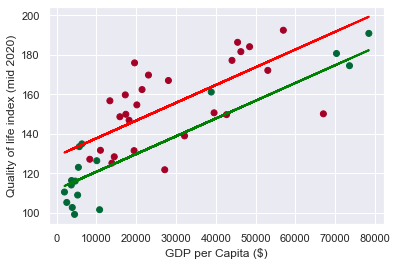

In [72]:
plt.scatter(europe["GDP per Capita ($)"], y, c = europe["EU Membership Status"], cmap = "RdYlGn_r")
yhat_no = 111.7948 + 0.0009 * europe["GDP per Capita ($)"] + 0
yhat_yes = 111.7948 + 0.0009 * europe["GDP per Capita ($)"] + 16.9577
fig = plt.plot(europe["GDP per Capita ($)"], yhat_no, lw = 2, c = "green")
fig = plt.plot(europe["GDP per Capita ($)"], yhat_yes, lw = 2, c = "red")
plt.xlabel("GDP per Capita ($)")
plt.ylabel("Quality of life index (mid 2020)")
plt.show()

#### K-Means Clustering

In [73]:
europe.tail()

,EU Membership Status,Euro Currency Users,Population,GDP (Billions)($),Military Spending (Millions)($),External Debt (Billions)($),Net Exports (Millions)($),Quality of life index (mid 2020),GDP Spent On Defence (%),GDP per Capita ($)
Country Name,,,,,,,,,,
Sweden,1,0,10099265,536,6326,940,14900,172.18,1.180224,53073
Switzerland,0,0,8654622,679,5000,1664,50100,190.92,0.736377,78455
Turkey,0,0,84339067,852,19000,452,-39500,126.40,2.230047,10102
Ukraine,0,0,43733762,112,5400,130,-7570,105.26,4.821429,2560
United Kingdom,0,0,67886011,2638,55100,8126,-166000,161.20,2.088704,38859


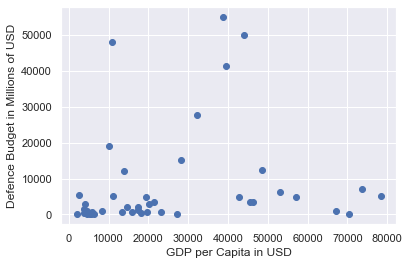

In [74]:
plt.scatter(europe["GDP per Capita ($)"], europe["Military Spending (Millions)($)"])
plt.xlabel("GDP per Capita in USD")
plt.ylabel("Defence Budget in Millions of USD")
plt.show()

In [75]:
data = europe[["GDP per Capita ($)", "Military Spending (Millions)($)"]]
data.head()

,GDP per Capita ($),Military Spending (Millions)($)
Country Name,,
Armenia,3704,1385
Albania,4517,250
Austria,46300,3380
Azerbaijan,3945,2805
Belarus,5714,623


In [76]:
from sklearn.cluster import KMeans

In [77]:
kmeans = KMeans(3)
kmeans.fit(data)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [78]:
clusters = data.copy()
clusters["Cluster prediction"] = kmeans.fit_predict(data)

Text(0, 0.5, 'Defence Budget in Millions of USD')

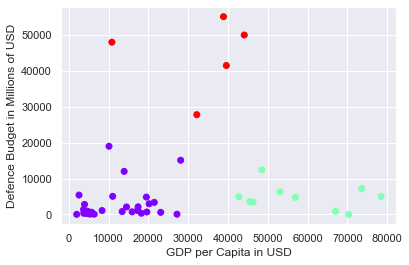

In [79]:
plt.scatter(clusters["GDP per Capita ($)"], clusters["Military Spending (Millions)($)"], 
           c = clusters["Cluster prediction"], cmap = "rainbow")
plt.xlabel("GDP per Capita in USD")
plt.ylabel("Defence Budget in Millions of USD")

In [80]:
from sklearn import preprocessing

In [81]:
x_scaled = preprocessing.scale(data)
x_scaled

array([[-1.01609109, -0.48535255],
       [-0.97813299, -0.56558189],
       [ 0.97267039, -0.34433271],
       [-1.00483906, -0.38497753],
       [-0.92224635, -0.53921577],
       [ 0.80505714, -0.23540459],
       [-0.93289142, -0.57159026],
       [-0.79931441, -0.50698267],
       [-0.56353533, -0.52670424],
       [-0.33830795, -0.55957353],
       [-0.24735793, -0.37338492],
       [ 1.47098129, -0.24678514],
       [-0.27397062, -0.5348332 ],
       [ 0.93443216, -0.33090225],
       [ 0.65850061,  2.35024202],
       [-1.01347651, -0.56013902],
       [ 0.8688809 ,  2.95107846],
       [-0.27971335, -0.24084747],
       [-0.51241096, -0.43622534],
       [ 2.09465195, -0.58205188],
       [ 1.94071857, -0.52175617],
       [ 0.31211547,  1.38183505],
       [-0.44643951, -0.53207642],
       [-0.38298926, -0.50500344],
       [ 0.07983806, -0.57872961],
       [-1.09644273, -0.58113295],
       [-0.89171179, -0.57865892],
       [ 1.07524595,  0.29460383],
       [-0.94199576,

In [82]:
wcss = []

for i in range(1, 10):
    kmeans = KMeans(i)
    kmeans.fit(x_scaled)
    wcss.append(kmeans.inertia_)
wcss

[86.00000000000003,
 44.74405406292682,
 14.290272206129034,
 10.846654822597044,
 7.761815881185708,
 5.1739336166546455,
 3.6974919290207136,
 2.7608489945561465,
 2.348887705026292]

Text(0, 0.5, 'WCSS value')

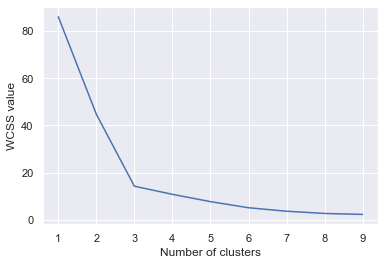

In [83]:
plt.plot(range(1, 10), wcss)
plt.xlabel("Number of clusters")
plt.ylabel("WCSS value")

We created the cluster model initially with 3 clusters, then we check our clusters were optimal, I standardised the values and used the elbow method to find the approapriate number of clusters to use to accurately interpret the data.

In [84]:
kmeans_new = KMeans(3)
kmeans_new.fit(x_scaled)
clust_new = data.copy()
clust_new["Cluster prediction"] = kmeans_new.fit_predict(x_scaled)

Text(0, 0.5, 'Military Spending in Millions of USD')

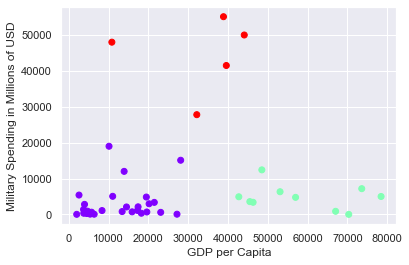

In [85]:
plt.scatter(clust_new["GDP per Capita ($)"],clust_new["Military Spending (Millions)($)"], 
            c = clust_new["Cluster prediction"], cmap = "rainbow")
plt.xlabel("GDP per Capita")
plt.ylabel("Military Spending in Millions of USD")